In [ ]:
!git clone https://github.com/LucasQCosta/Machine_Learning---Alura.git

Cloning into 'Machine_Learning---Alura'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 48 (delta 13), reused 17 (delta 5), pack-reused 0
Receiving objects: 100% (48/48), 387.50 KiB | 1.54 MiB/s, done.
Resolving deltas: 100% (13/13), done.


## Dimensionalidade dos Dados

Quando há muitas dimensões, faz-se necessário diminuir as dimensões para que possa ser reduzido a sua complexidade.

### Importando os dados

In [ ]:
import pandas as pd
exames = pd.read_csv('/content/Machine_Learning---Alura/3 - Lidando com dados de muitas dimensões/exames.csv')
exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


Verificando se há colunas com valores vázios:

In [ ]:
'''
Lógica: Quando usamos o isnull(), ele retorna dois valores
  -> Zero (0) para uma celula que tenha valor
  -> Um (1) para uma celular que esteja vázia ou com números que não respeitem float32
Logo, se a somatória dos valores de uma coluna for 0, então, naquela coluna não há celular vázias
Se o somatório daquela coluna for maior que 0, então há valores vázios
'''
exames.isnull().sum() # Somatório dos valores vázios de cada coluna

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

Nesse caso, como há muitos valores de exames faltando na coluna 'exame_33'. Então, temos que a melhor opção a exclusão desses valores.

In [ ]:
exames_v1 = exames.drop(columns='exame_33')

In [ ]:
from sklearn.model_selection import train_test_split
from numpy import random

seed = 123143
random.seed(seed) # Selecionando uma seed para replicar o exemplo

valores_exames = exames_v1.drop(columns=['id', 'diagnostico']) # Selecionando os dados exceto a coluna id e diagnostico
diagnostico = exames_v1.diagnostico

# Divida matrizes ou matrizes em subconjuntos aleatórios de treinamento e teste.
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico, test_size=0.3)


## Utilizando o Randon Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(treino_x, treino_y)
print(f'Resultado do classificador: %.2f%%' %(classifier.score(teste_x, teste_y)*100))

Resultado do classificador: 92.40%


### Verificando um valor base com um classificador bobo

In [ ]:
# Utilizando o dummy classifier
from sklearn.dummy import DummyClassifier

seed = 123143
random.seed(seed)

dc = DummyClassifier(strategy="most_frequent")
dc.fit(treino_x, treino_y)
print(f'Resultado do classificador: %.2f%%' %(dc.score(teste_x, teste_y)*100))

Resultado do classificador: 66.67%


### Verificar os daods com outra visualização

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames)
valores_exames_padronizados = padronizador.transform(valores_exames)
valores_exames_padronizados = pd.DataFrame(data = valores_exames_padronizados,
                                           columns=valores_exames.keys())

In [ ]:
def plot_violino(x, y):
  dados_plot = pd.concat([diagnostico, valores_exames_padronizados.iloc[:,x:y]], axis=1) # Concatenando diagnostico com valores exames
                                                                            #sendo que os valores exames sõa selecionados as 10 primeiras colunas
  dados_plot = pd.melt(dados_plot, id_vars='diagnostico', #Divide os valores em 3 colunas: diagnosticos
                      var_name='exames', # exames
                      value_name='valores') # valores
  plt.figure(figsize=(10,10))
  sns.violinplot(x = "exames", y="valores", hue = "diagnostico", data = dados_plot, split= True)
  plt.xticks(rotation = 90)

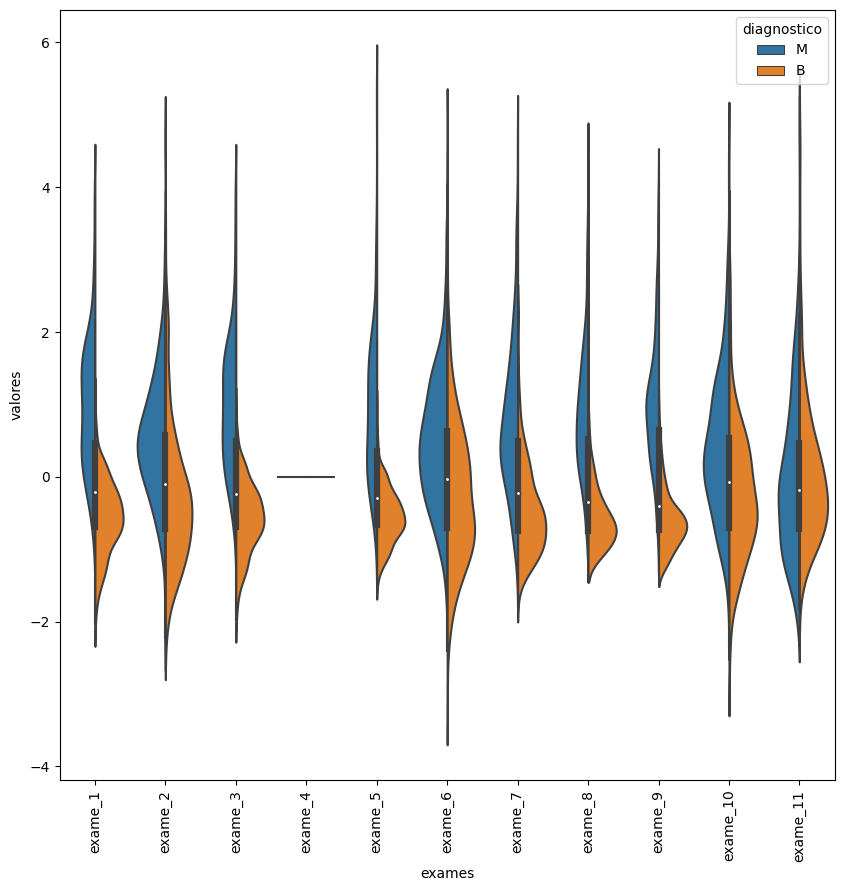

In [ ]:
plot_violino(0, 11)

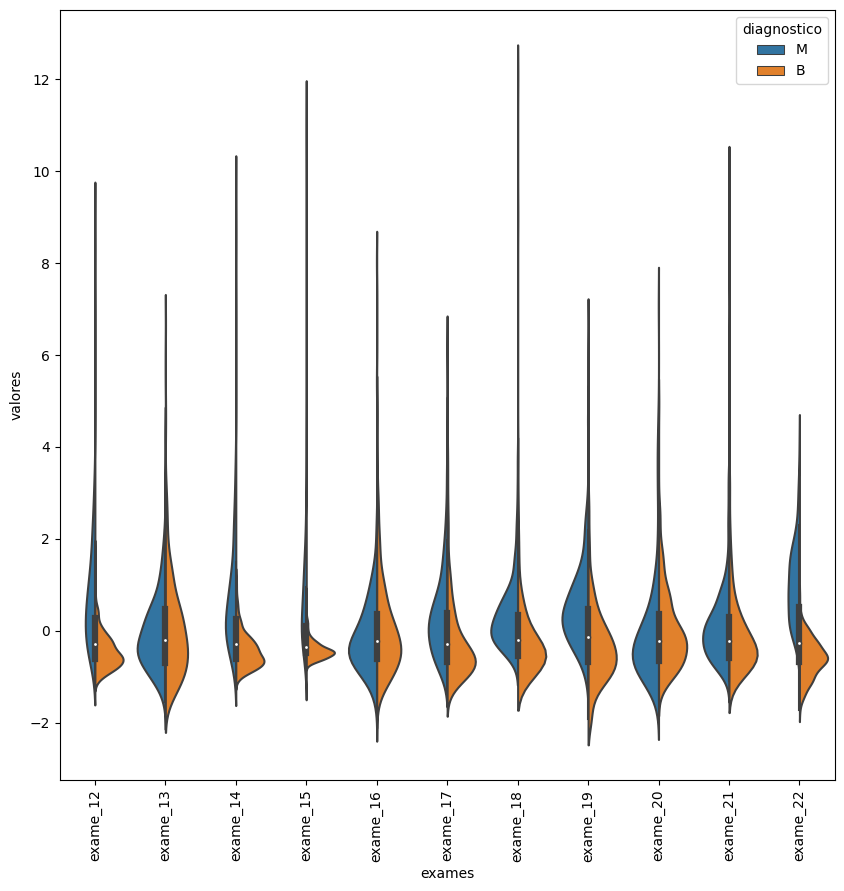

In [ ]:
plot_violino(11, 22)

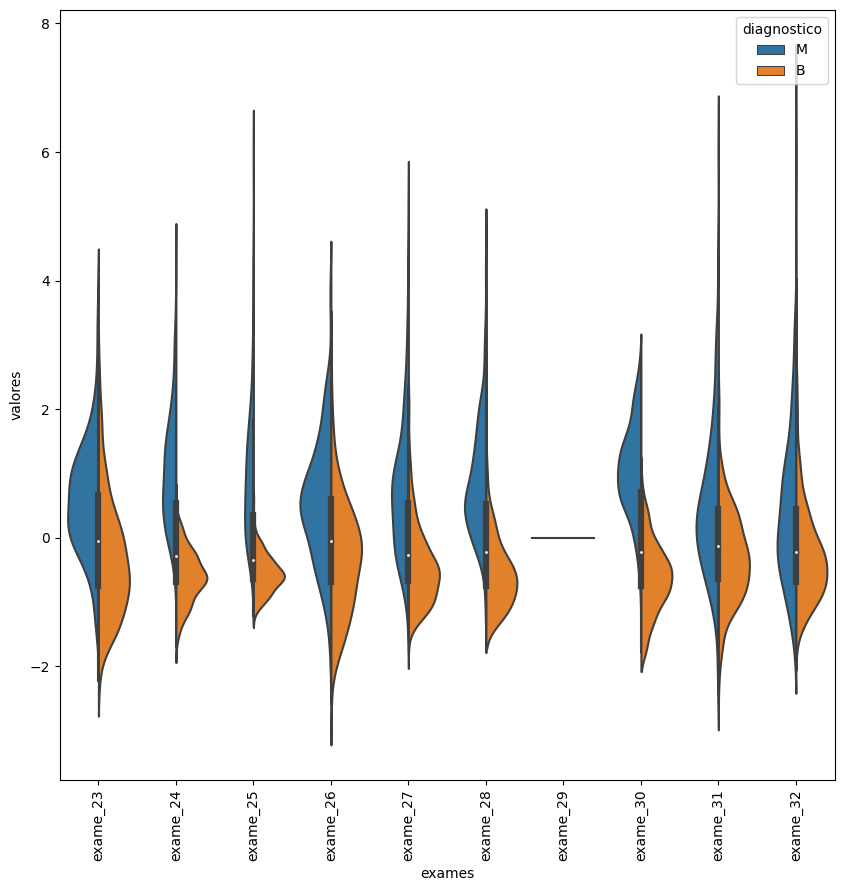

In [ ]:
plot_violino(22, 32)

Com esses plotes, podemos verificar que há valores constantes, que não modificam o nosso o resultado no treinamento dos nosso modelo.

In [ ]:
valores_exames_v3 = valores_exames_padronizados.drop(columns=["exame_4","exame_29"])

In [ ]:
def classificar(valores):
  seed = 1234
  random.seed(seed)
  treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, test_size=0.3)
  classifier = RandomForestClassifier(n_estimators = 100)
  classifier.fit(treino_x, treino_y)
  print(f'Resultado do classificador: %.2f%%' %(classifier.score(teste_x, teste_y)*100))

In [ ]:
classificar(valores_exames_v3)

Resultado do classificador: 92.98%


### Calculando a correlação por meio de um mapa de calor

<Axes: >

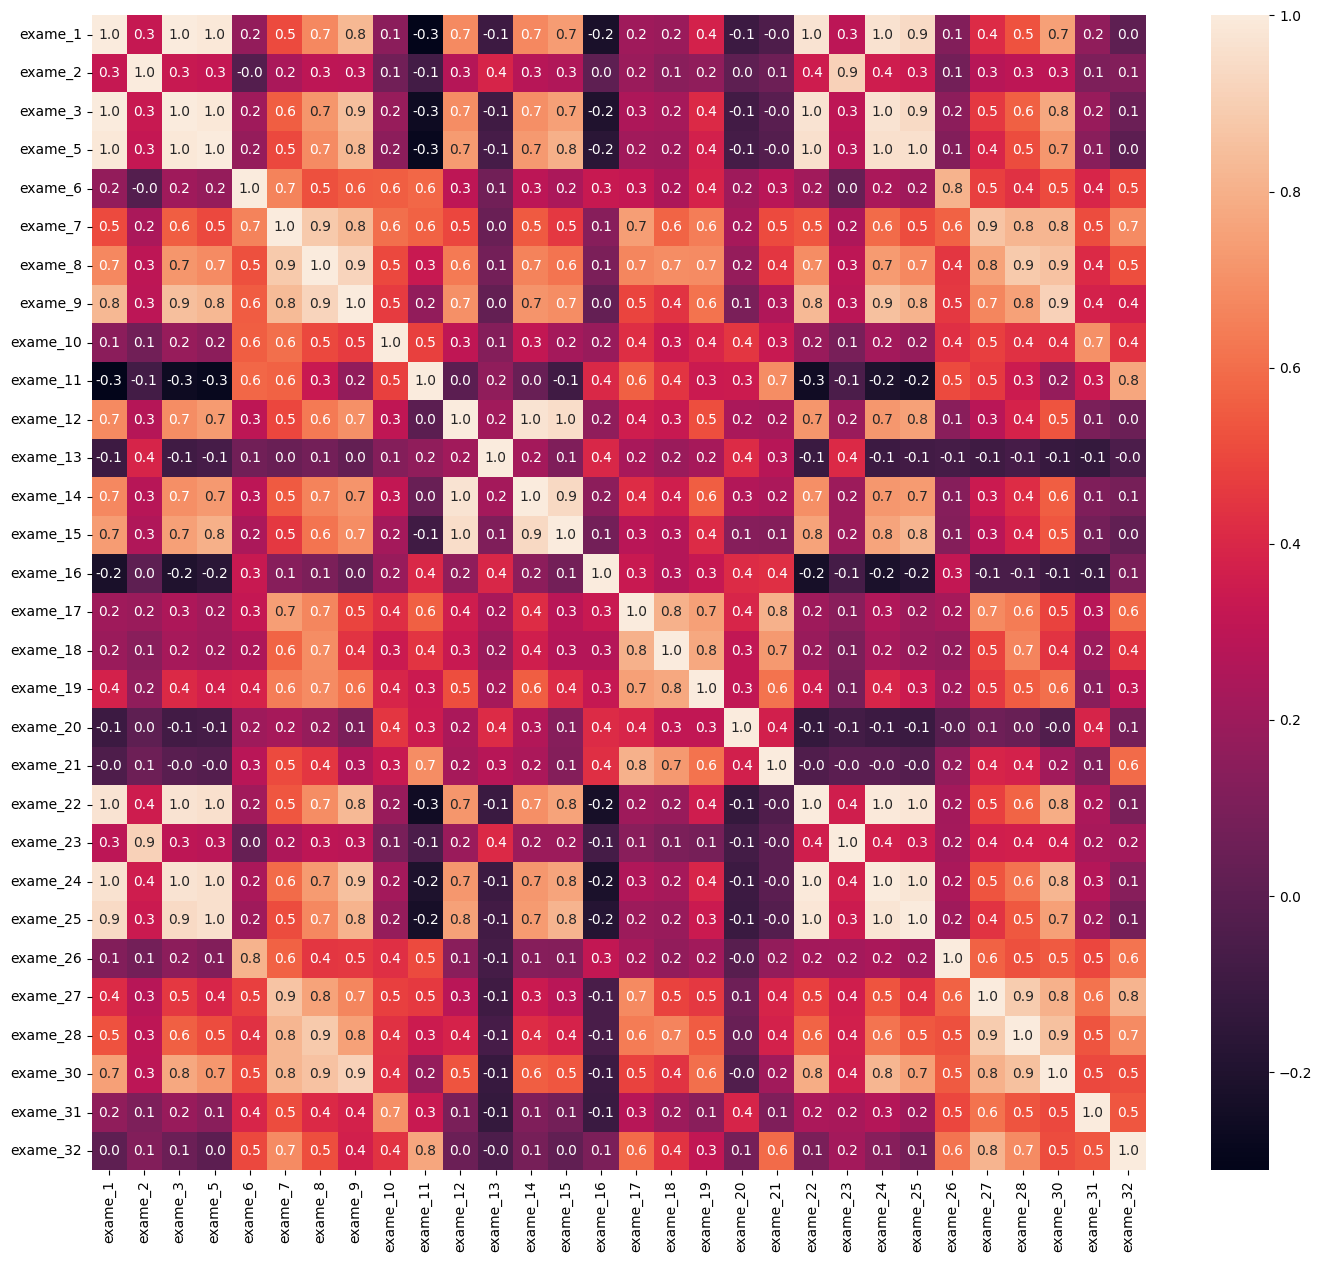

In [ ]:
matriz_correlacao = valores_exames_v3.corr()
plt.figure(figsize = (17,15))
sns.heatmap(matriz_correlacao, annot = True, fmt = ".1f")


In [ ]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao>0.99]
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

Logo, tudo que é maior que 1, é altamente correlacionado.

In [ ]:
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2>1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

Então, vamos excluir essas variáveis do nosso modelo

In [ ]:
valores_exames_v4 = valores_exames_v3.drop(columns=variaveis_correlacionadas.keys())
valores_exames_v4.head()
classificar(valores_exames_v4)

Resultado do classificador: 91.81%


In [ ]:
valores_exames_v5 = valores_exames_v3.drop(columns = ['exame_3', 'exame_24'])
valores_exames_v5.head()
classificar(valores_exames_v5)

Resultado do classificador: 92.98%


## Como selecionar as K-melhores Features

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

selecionar_kbest = SelectKBest(chi2, k=10)

In [ ]:
valores_v6 = valores_exames.drop(columns=["exame_3", "exame_4", "exame_24","exame_29"])

In [ ]:
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_v6, diagnostico, test_size=0.3)
selecionar_kbest.fit(treino_x, treino_y)
treino_kbest = selecionar_kbest.transform(treino_x)
teste_kbest = selecionar_kbest.transform(teste_x)

In [ ]:
classificador = RandomForestClassifier(n_estimators = 100, random_state=1234)
classificador.fit(treino_kbest, treino_y)

print("Resultado da classificação %.2f%%" % (classificador.score(teste_kbest, teste_y)* 100))

Resultado da classificação 95.91%


### Plotando a matrix de confusão

In [ ]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))

[Text(0.5, 5.049999999999999, 'Predição'), Text(32.25, 0.5, 'Original')]

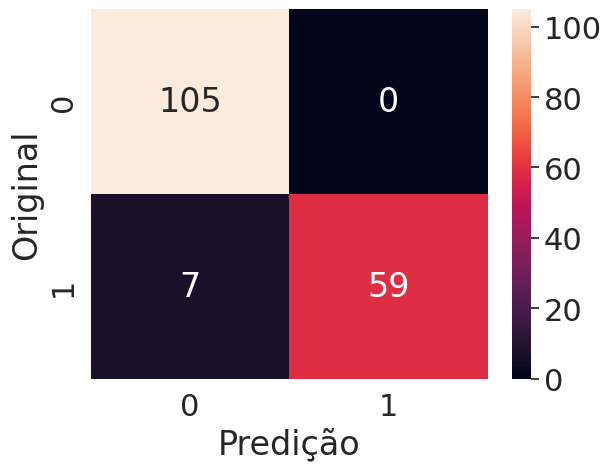

In [ ]:
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Original")

### Avaliação RFE

Resultado da classificação 90.06%


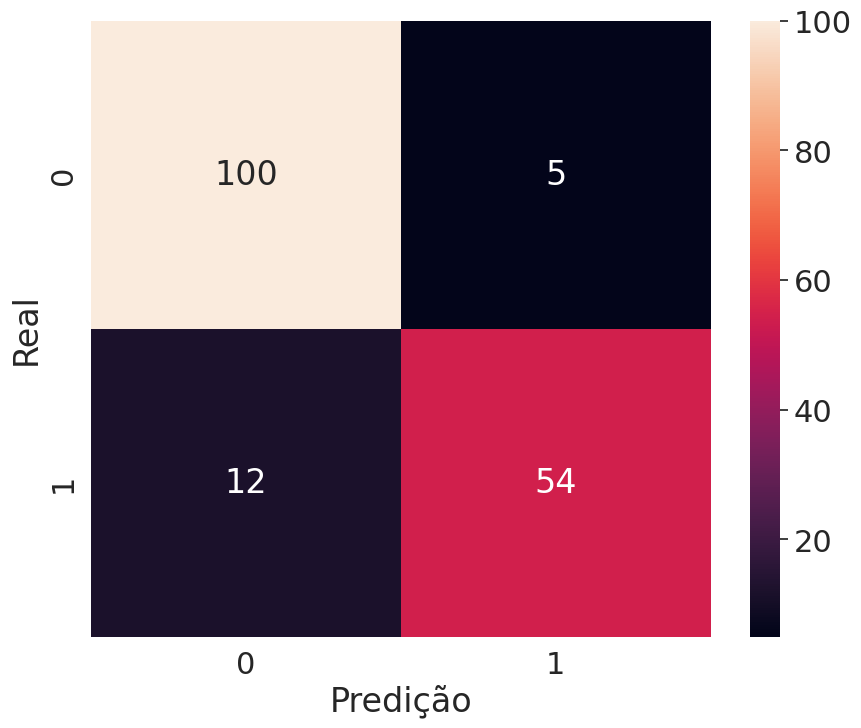

In [ ]:
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_v6,
                                                       diagnostico,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = 1234)
classificador.fit(treino_x, treino_y)


selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 5, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfe, teste_y)* 100))


Resultado da classificação 92.98%


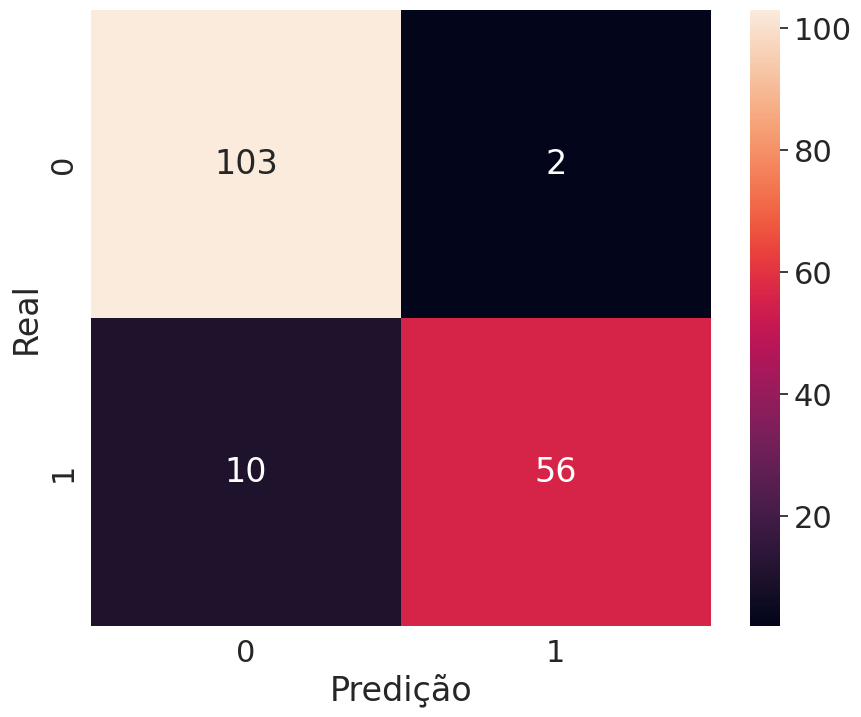

In [ ]:
from sklearn.feature_selection import RFECV

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_v6,
                                                       diagnostico,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = 1234)
classificador.fit(treino_x, treino_y)


selecionador_rfecv = RFECV(estimator = classificador, cv = 5, step = 1, scoring='accuracy')
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)
classificador.fit(treino_rfecv, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfecv, teste_y)* 100))

In [ ]:
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

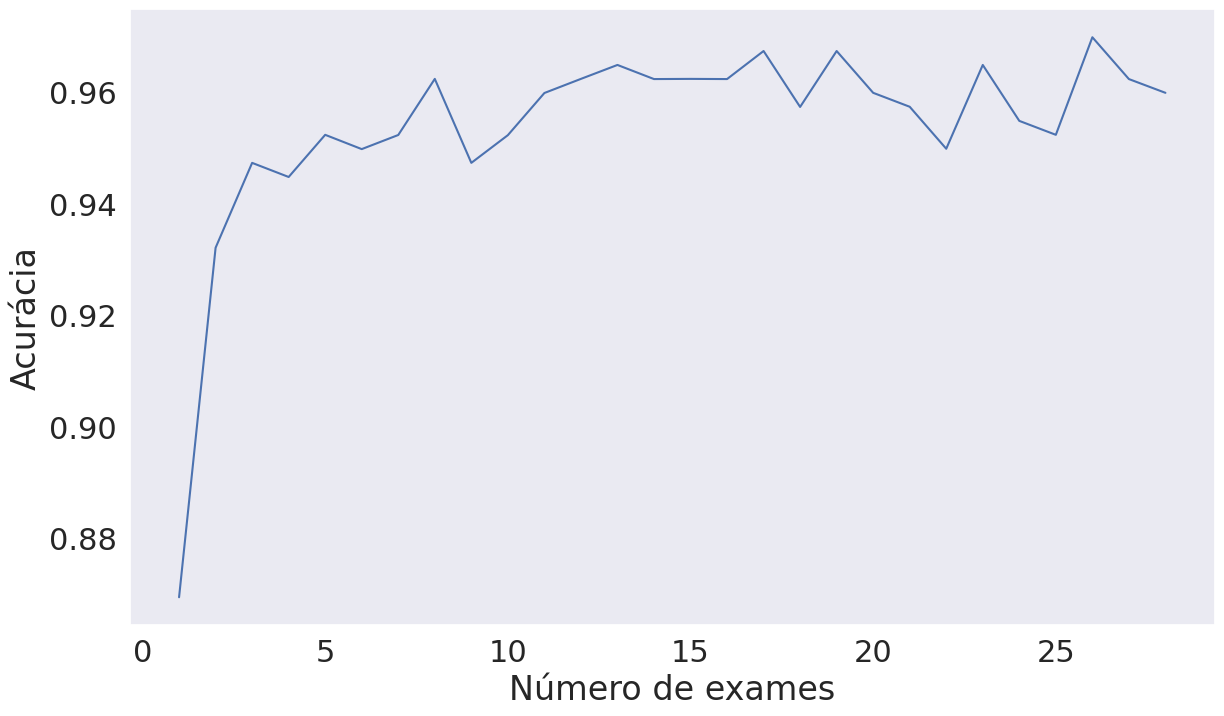

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")
plt.grid()
plt.plot(range(1, len(selecionador_rfecv.cv_results_['mean_test_score']) + 1), selecionador_rfecv.cv_results_['mean_test_score'])
plt.show()

In [ ]:
valores_exames_v7 = selecionador_rfe.transform(valores_v6)
valores_exames_v7.shape

(569, 5)

<Axes: >

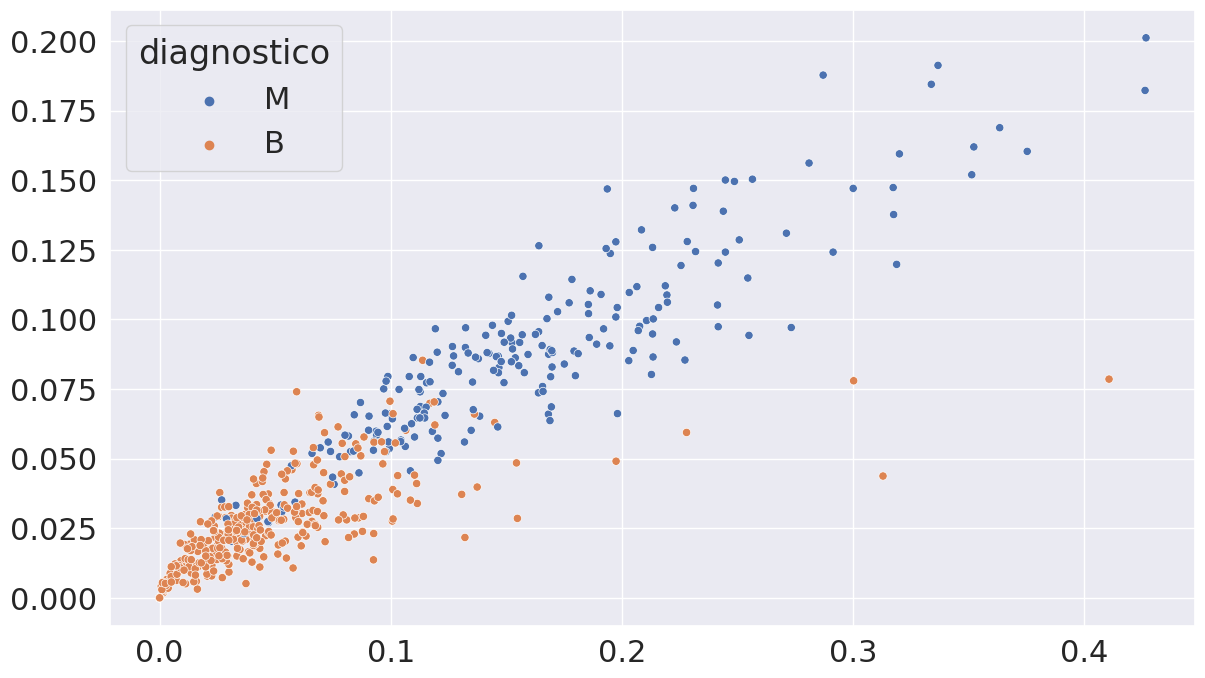

In [ ]:
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v7[:,0], y = valores_exames_v7[:,1], hue = diagnostico)

In [ ]:
from sklearn.decomposition import PCA

<Axes: >

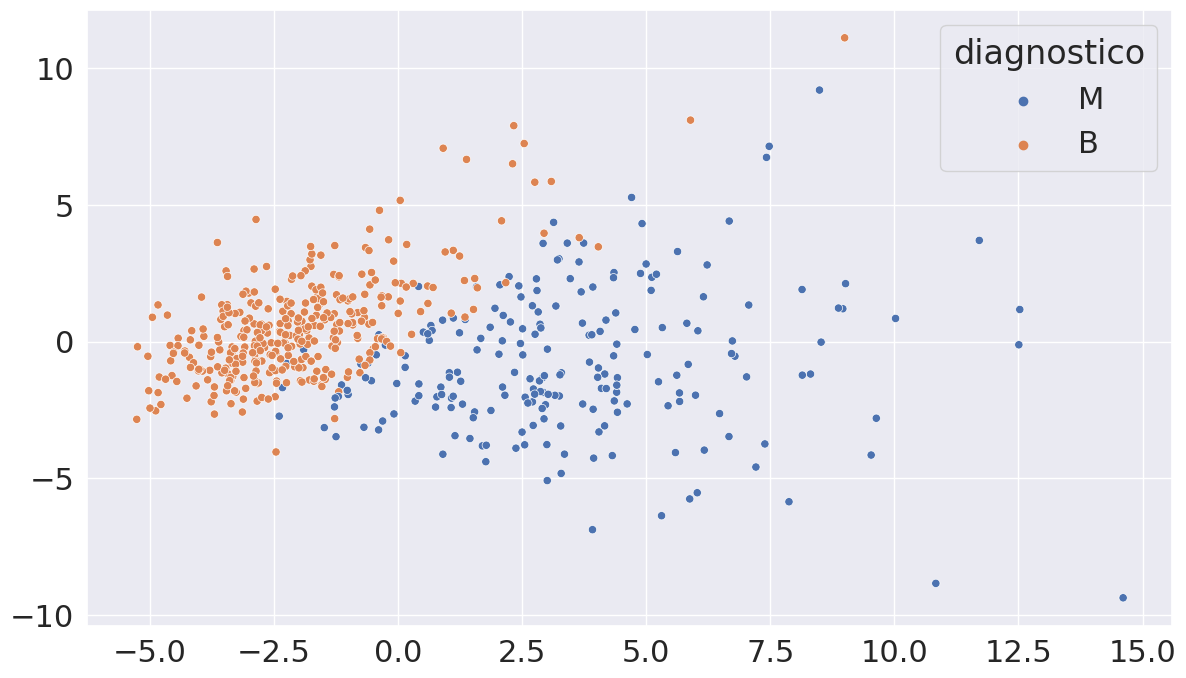

In [ ]:
pca = PCA(n_components = 2)
valores_exames_v8 = pca.fit_transform(valores_exames_v5)
plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v8[:,0], y = valores_exames_v8[:,1], hue = diagnostico)

<Axes: >

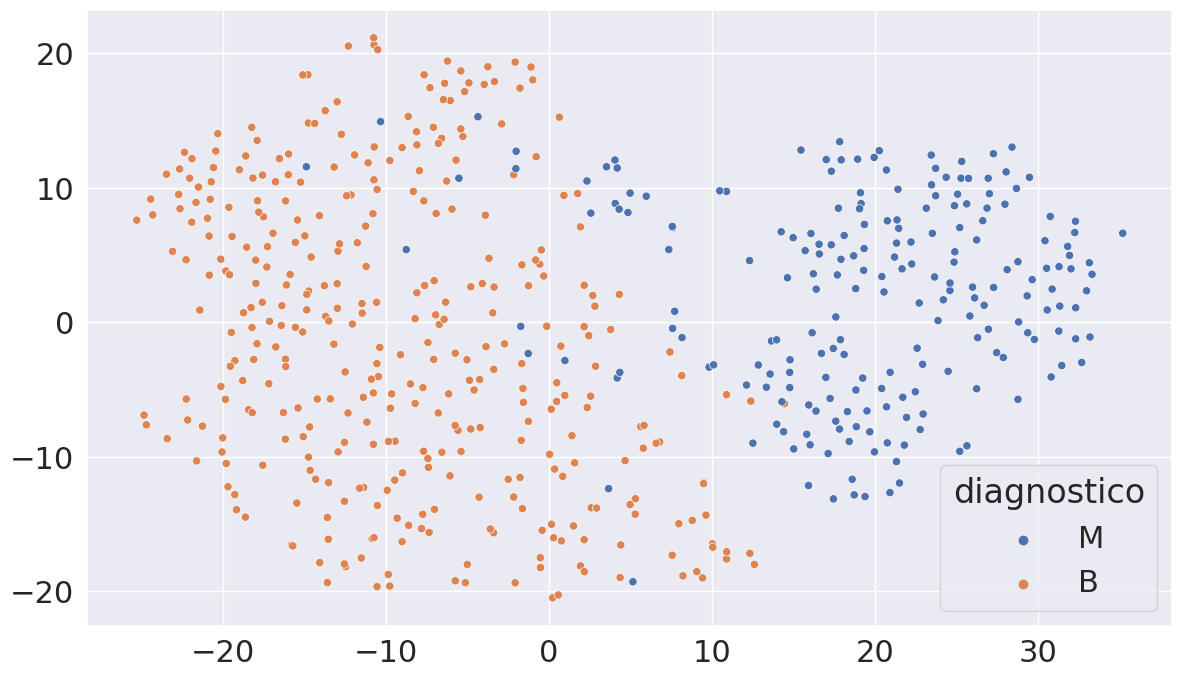

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5)

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v9[:,0], y = valores_exames_v9[:,1], hue = diagnostico)